In [1]:
#librerias
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import date
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

#Datasets
df = pd.read_csv('bike_rancagua.csv')
df

,Time,Alameda,Cabello,República de Chile con San Joaquín,San Juan con Escrivá de Balaguer,Unnamed: 5
0,2017-03-21 00:00:00,NaN,NaN,NaN,NaN,NaN
1,2017-03-22 00:00:00,NaN,159.0,NaN,NaN,NaN
2,2017-03-23 00:00:00,NaN,203.0,NaN,NaN,NaN
3,2017-03-24 00:00:00,NaN,207.0,NaN,NaN,NaN
4,2017-03-25 00:00:00,NaN,132.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2570,2024-04-03 00:00:00,1006.0,280.0,490.0,1249.0,NaN
2571,2024-04-04 00:00:00,1088.0,323.0,584.0,1454.0,NaN
2572,2024-04-05 00:00:00,1099.0,392.0,618.0,1481.0,NaN
2573,2024-04-06 00:00:00,665.0,257.0,439.0,1207.0,NaN


In [2]:
#Eliminamos la ultima columna
df = df.drop ('Unnamed: 5', axis = 1)
df

,Time,Alameda,Cabello,República de Chile con San Joaquín,San Juan con Escrivá de Balaguer
0,2017-03-21 00:00:00,NaN,NaN,NaN,NaN
1,2017-03-22 00:00:00,NaN,159.0,NaN,NaN
2,2017-03-23 00:00:00,NaN,203.0,NaN,NaN
3,2017-03-24 00:00:00,NaN,207.0,NaN,NaN
4,2017-03-25 00:00:00,NaN,132.0,NaN,NaN
...,...,...,...,...,...
2570,2024-04-03 00:00:00,1006.0,280.0,490.0,1249.0
2571,2024-04-04 00:00:00,1088.0,323.0,584.0,1454.0
2572,2024-04-05 00:00:00,1099.0,392.0,618.0,1481.0
2573,2024-04-06 00:00:00,665.0,257.0,439.0,1207.0


In [3]:
df['Time'] = pd.to_datetime(df['Time'])
df.dtypes

Time                                  datetime64[ns]
Alameda                                      float64
Cabello                                      float64
República de Chile con San Joaquín           float64
San Juan con Escrivá de Balaguer             float64
dtype: object

In [10]:
#--------------------------Analisis exploratorio------------------------------
#cantidad de datos faltantes por columna
print("Cantidad de datos faltantes por columna:")
print(df.isnull().sum())

Cantidad de datos faltantes por columna:
Time                                     0
Alameda                                 66
Cabello                                572
República de Chile con San Joaquín    1189
San Juan con Escrivá de Balaguer      1137
dtype: int64


In [11]:
df.describe()

,Time,Alameda,Cabello,República de Chile con San Joaquín,San Juan con Escrivá de Balaguer
count,2575,2509.000000,2003.000000,1386.000000,1438.000000
mean,2020-09-28 00:00:00,787.644081,239.986021,505.036075,1271.545202
min,2017-03-21 00:00:00,66.000000,0.000000,0.000000,24.000000
25%,2018-12-24 12:00:00,528.000000,167.000000,417.750000,1007.000000
50%,2020-09-28 00:00:00,794.000000,257.000000,571.000000,1303.500000
75%,2022-07-03 12:00:00,1055.000000,317.000000,667.750000,1611.750000
max,2024-04-07 00:00:00,1596.000000,466.000000,979.000000,2378.000000
std,NaN,317.231191,99.604557,242.012218,464.257170


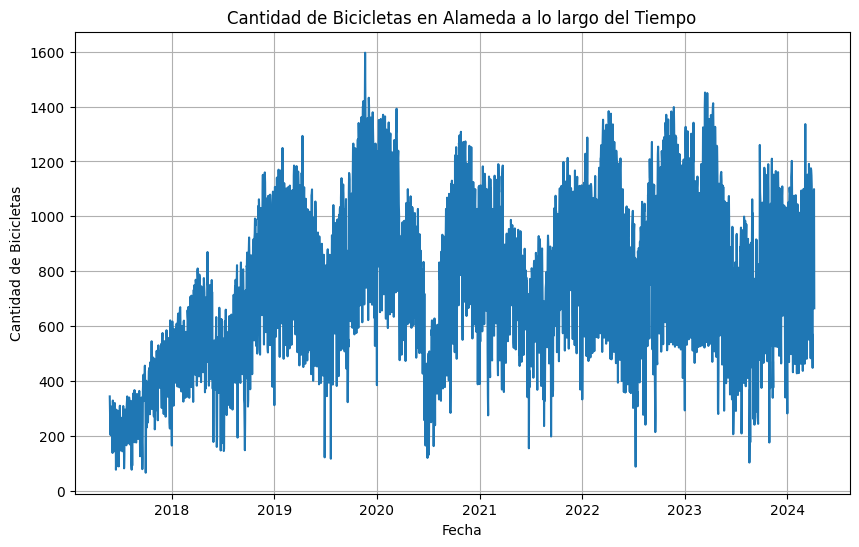

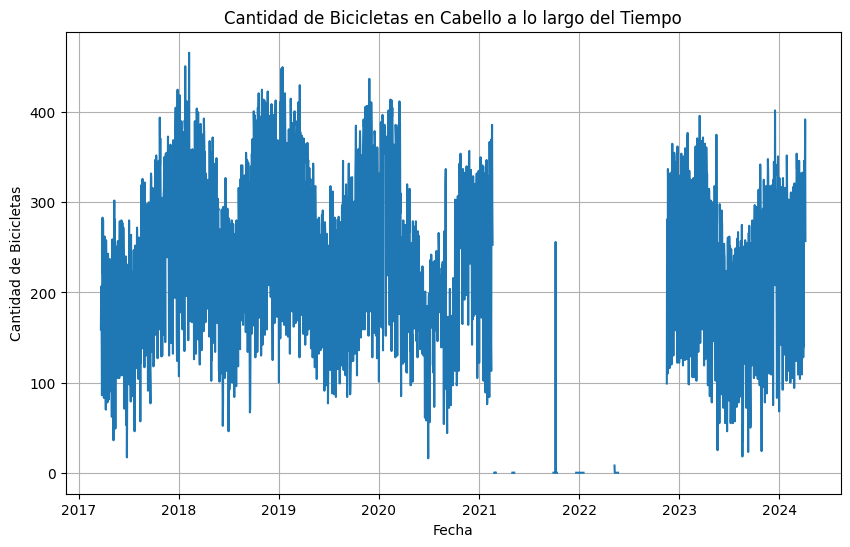

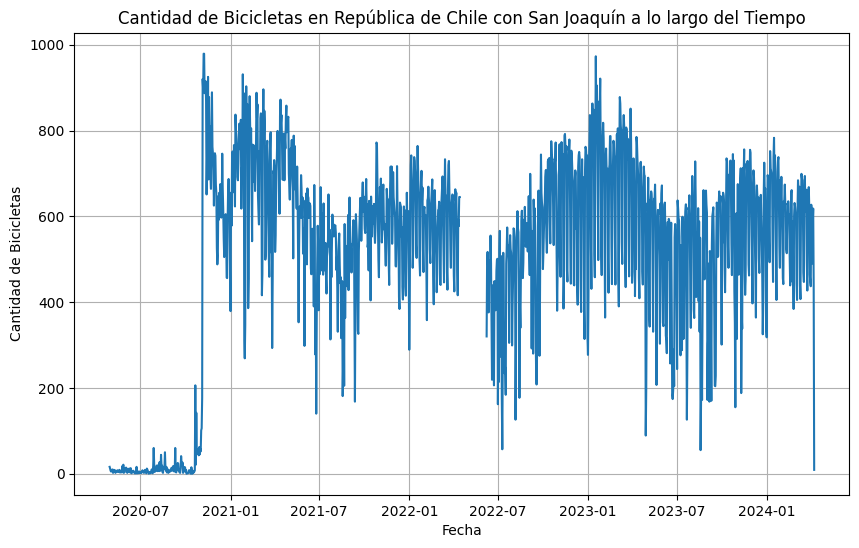

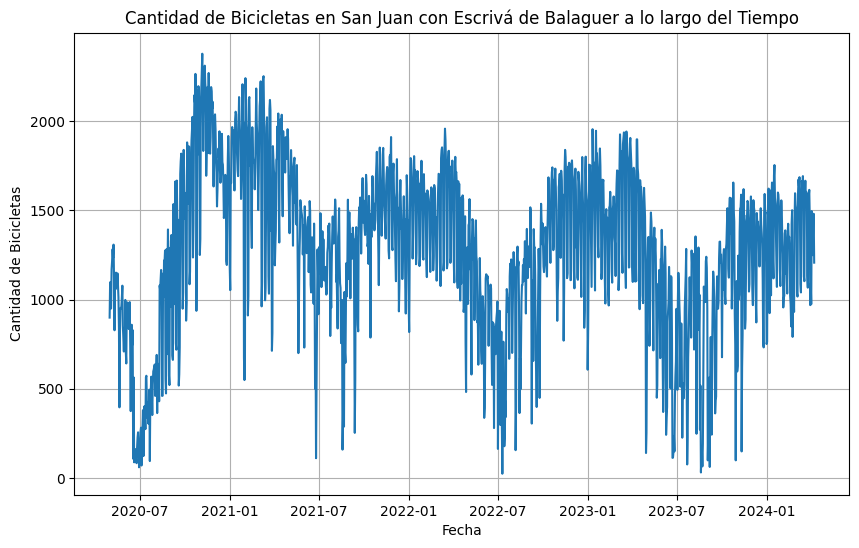

In [13]:
# Obtener una lista de todas las columnas excepto 'Time'
columnas = df.columns.tolist()
columnas.remove('Time')

# Graficar cada columna individualmente
for columna in columnas:
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time'], df[columna])
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de Bicicletas')
    plt.title(f'Cantidad de Bicicletas en {columna} a lo largo del Tiempo')
    plt.grid(True)
    plt.show()

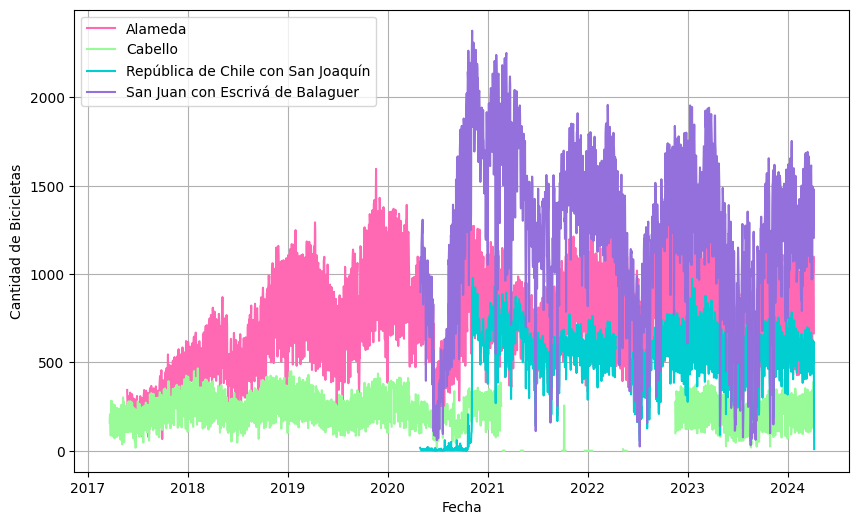

In [25]:
# Graficar todas las series juntas en una sola figura
plt.figure(figsize=(10, 6))

plt.plot(df['Time'], df['Alameda'], color='#FF69B4', label='Alameda')
plt.plot(df['Time'], df['Cabello'], color='#98FB98', label='Cabello')  # Corregido: un solo #
plt.plot(df['Time'], df['República de Chile con San Joaquín'], color='#00CED1', label='República de Chile con San Joaquín')
plt.plot(df['Time'], df['San Juan con Escrivá de Balaguer'],color='#9370DB',label='San Juan con Escrivá de Balaguer')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de Bicicletas')
plt.legend()
plt.grid(True)
plt.show()

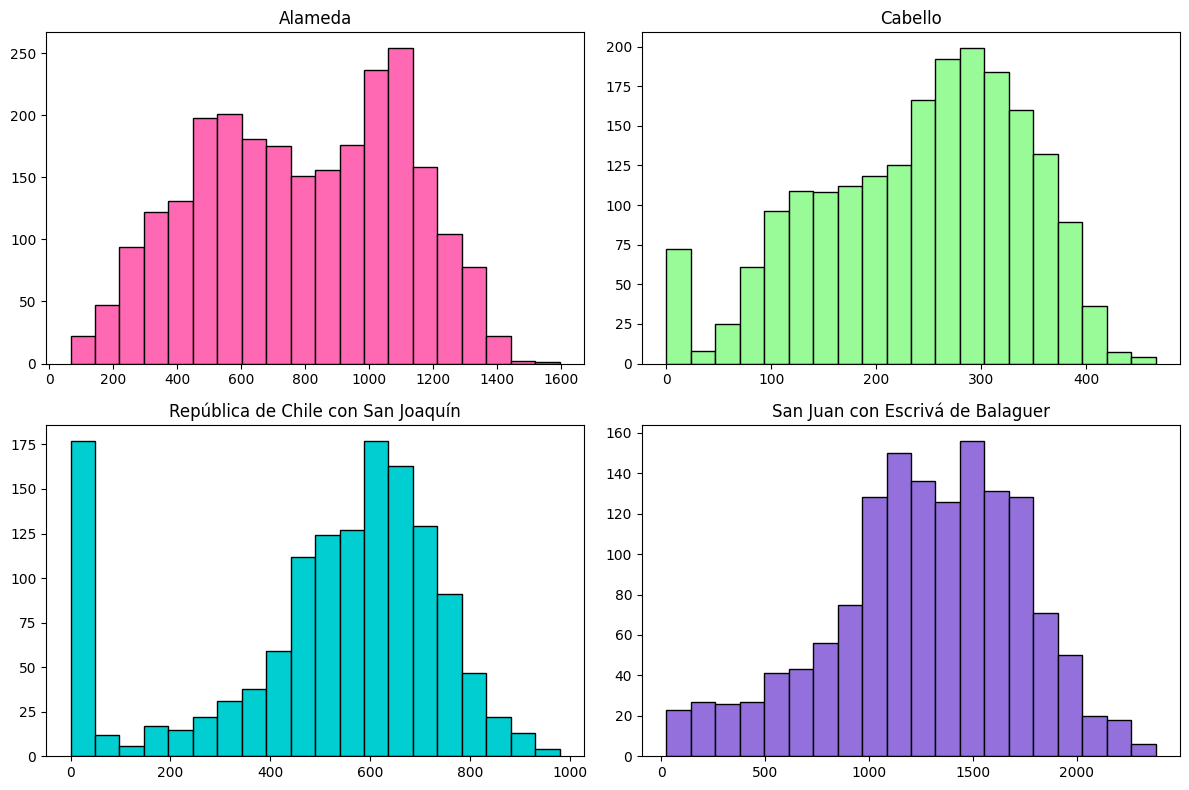

In [28]:
# Histogramas
plt.figure(figsize=(12, 8))

plt.subplot(221)  
plt.hist(df['Alameda'], color='#FF69B4', bins=20, edgecolor='black')
plt.title('Alameda')

plt.subplot(222)  
plt.hist(df['Cabello'], color='#98FB98', bins=20, edgecolor='black')
plt.title('Cabello')

plt.subplot(223)  
plt.hist(df['República de Chile con San Joaquín'], color='#00CED1', bins=20, edgecolor='black')
plt.title('República de Chile con San Joaquín')

plt.subplot(224) 
plt.hist(df['San Juan con Escrivá de Balaguer'], color='#9370DB', bins=20, edgecolor='black')
plt.title('San Juan con Escrivá de Balaguer')

plt.tight_layout()
plt.show()



In [4]:
#Relleno de datos faltantes
metodo_1 = df.copy()
metodo_2 = df.copy()
metodo_3 = df.copy()
metodo_4 = df.copy()

In [8]:
#Metodo 1
# Calcular la moda de cada serie
moda_alameda = metodo_1['Alameda'].mode()[0]
moda_cabello = metodo_1['Cabello'].mode()[0]
moda_republica = metodo_1['República de Chile con San Joaquín'].mode()[0]
moda_sanjuan = metodo_1['San Juan con Escrivá de Balaguer'].mode()[0]

# Rellenar los valores faltantes con la moda
metodo_1['Alameda'].fillna(moda_alameda, inplace=True)
metodo_1['Cabello'].fillna(moda_cabello, inplace=True)
metodo_1['República de Chile con San Joaquín'].fillna(moda_republica, inplace=True)
metodo_1['San Juan con Escrivá de Balaguer'].fillna(moda_sanjuan, inplace=True)

metodo_1

C:\Users\maria\AppData\Local\Temp\ipykernel_1876\2699081202.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  metodo_1['Cabello'].fillna(moda_cabello, inplace=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_1876\2699081202.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

,Time,Alameda,Cabello,República de Chile con San Joaquín,San Juan con Escrivá de Balaguer
0,2017-03-21,482.0,0.0,4.0,1115.0
1,2017-03-22,482.0,159.0,4.0,1115.0
2,2017-03-23,482.0,203.0,4.0,1115.0
3,2017-03-24,482.0,207.0,4.0,1115.0
4,2017-03-25,482.0,132.0,4.0,1115.0
...,...,...,...,...,...
2570,2024-04-03,1006.0,280.0,490.0,1249.0
2571,2024-04-04,1088.0,323.0,584.0,1454.0
2572,2024-04-05,1099.0,392.0,618.0,1481.0
2573,2024-04-06,665.0,257.0,439.0,1207.0


In [18]:
from sklearn.metrics import mean_squared_error

# Reemplazar los valores NaN en los datos originales
df.fillna(df.mean(), inplace=True)

mse_alameda = mean_squared_error(df['Alameda'], metodo_1['Alameda'])
mse_cabello = mean_squared_error(df['Cabello'], metodo_1['Cabello'])
mse_republica = mean_squared_error(df['República de Chile con San Joaquín'], metodo_1['República de Chile con San Joaquín'])
mse_sanjuan = mean_squared_error(df['San Juan con Escrivá de Balaguer'], metodo_1['San Juan con Escrivá de Balaguer'])

print("MSE Alameda:", mse_alameda)
print("MSE Cabello:", mse_cabello)
print("MSE República de Chile con San Joaquín:", mse_republica)
print("MSE San Juan con Escrivá de Balaguer:", mse_sanjuan)


MSE Alameda: 2394.410909871787
MSE Cabello: 12793.538652000287
MSE República de Chile con San Joaquín: 115915.79400066151
MSE San Juan con Escrivá de Balaguer: 10820.884267288524


In [13]:
#cantidad de datos faltantes por columna
print("Cantidad de datos faltantes por columna:")
print(metodo_1.isnull().sum())

Cantidad de datos faltantes por columna:
Time                                  0
Alameda                               0
Cabello                               0
República de Chile con San Joaquín    0
San Juan con Escrivá de Balaguer      0
dtype: int64


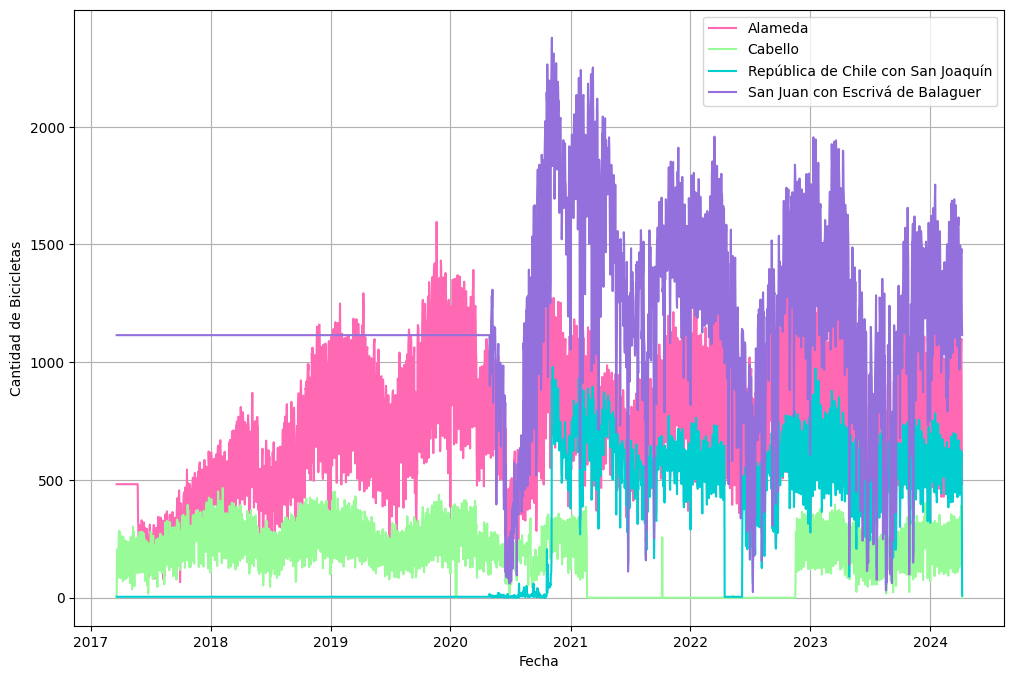

In [47]:
# Graficar las series de tiempo
plt.figure(figsize=(12, 8))

plt.plot(metodo_1['Time'], metodo_1['Alameda'], color='#FF69B4', label='Alameda')
plt.plot(metodo_1['Time'], metodo_1['Cabello'], color='#98FB98', label='Cabello')
plt.plot(metodo_1['Time'], metodo_1['República de Chile con San Joaquín'], color='#00CED1', label='República de Chile con San Joaquín')
plt.plot(metodo_1['Time'], metodo_1['San Juan con Escrivá de Balaguer'], color='#9370DB', label='San Juan con Escrivá de Balaguer')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de Bicicletas')
plt.legend()
plt.grid(True)
plt.show()

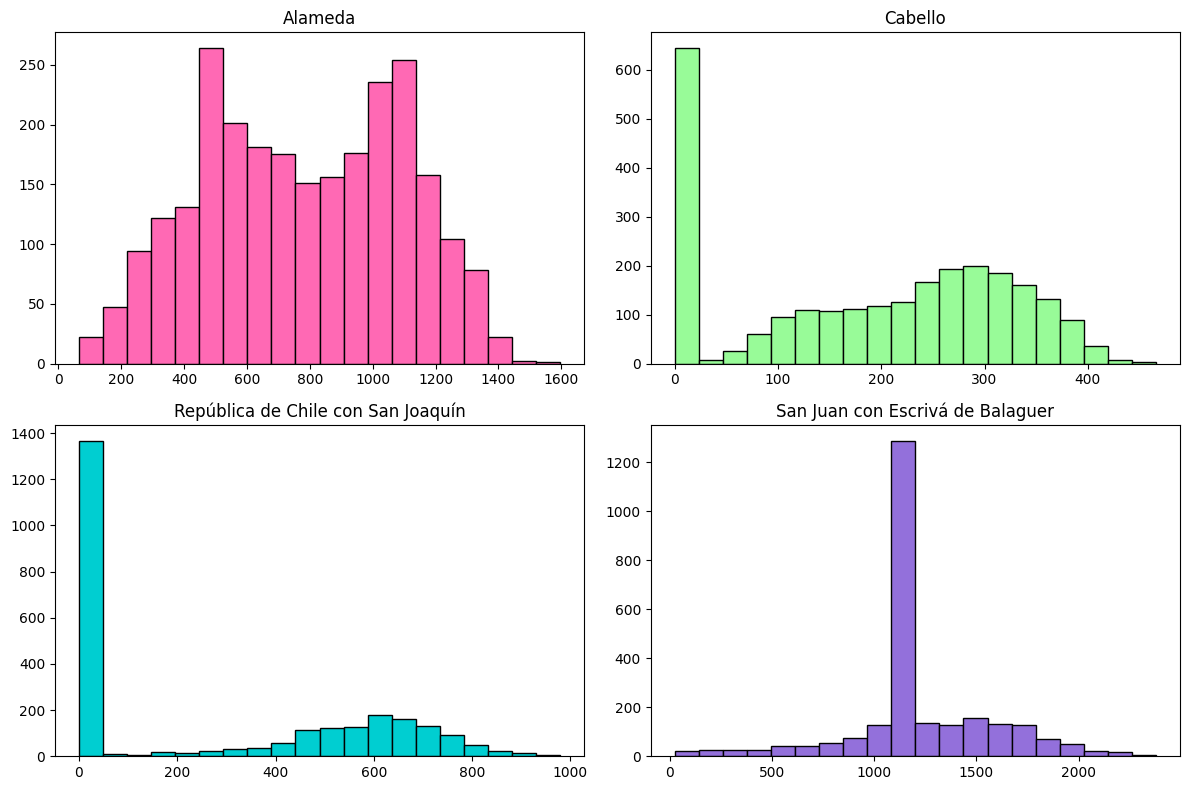

In [38]:
# Graficar histograma para cada serie con bordes
plt.figure(figsize=(12, 8))

plt.subplot(221)  
plt.hist(metodo_1['Alameda'], color='#FF69B4', bins=20, edgecolor='black')
plt.title('Alameda')

plt.subplot(222)  
plt.hist(metodo_1['Cabello'], color='#98FB98', bins=20, edgecolor='black')
plt.title('Cabello')

plt.subplot(223)  
plt.hist(metodo_1['República de Chile con San Joaquín'], color='#00CED1', bins=20, edgecolor='black')
plt.title('República de Chile con San Joaquín')

plt.subplot(224)  
plt.hist(metodo_1['San Juan con Escrivá de Balaguer'], color='#9370DB', bins=20, edgecolor='black')
plt.title('San Juan con Escrivá de Balaguer')

plt.tight_layout()
plt.show()

In [19]:
#metodo 2:  interpolación lineal
# Ordenar el DataFrame por la columna 'Time'
metodo_2 = df.sort_values(by='Time')

metodo_2['Alameda'] = metodo_2['Alameda'].interpolate(method='linear')
metodo_2['Cabello'] = metodo_2['Cabello'].interpolate(method='linear')
metodo_2['República de Chile con San Joaquín'] = metodo_2['República de Chile con San Joaquín'].interpolate(method='linear')
metodo_2['San Juan con Escrivá de Balaguer'] = metodo_2['San Juan con Escrivá de Balaguer'].interpolate(method='linear')

metodo_2

,Time,Alameda,Cabello,República de Chile con San Joaquín,San Juan con Escrivá de Balaguer
0,2017-03-21,787.644081,239.986021,505.036075,1271.545202
1,2017-03-22,787.644081,159.000000,505.036075,1271.545202
2,2017-03-23,787.644081,203.000000,505.036075,1271.545202
3,2017-03-24,787.644081,207.000000,505.036075,1271.545202
4,2017-03-25,787.644081,132.000000,505.036075,1271.545202
...,...,...,...,...,...
2570,2024-04-03,1006.000000,280.000000,490.000000,1249.000000
2571,2024-04-04,1088.000000,323.000000,584.000000,1454.000000
2572,2024-04-05,1099.000000,392.000000,618.000000,1481.000000
2573,2024-04-06,665.000000,257.000000,439.000000,1207.000000


In [20]:
from sklearn.metrics import mean_squared_error

# Reemplazar los valores NaN en los datos originales
df.fillna(df.mean(), inplace=True)

mse_alameda = mean_squared_error(df['Alameda'], metodo_2['Alameda'])
mse_cabello = mean_squared_error(df['Cabello'], metodo_2['Cabello'])
mse_republica = mean_squared_error(df['República de Chile con San Joaquín'], metodo_2['República de Chile con San Joaquín'])
mse_sanjuan = mean_squared_error(df['San Juan con Escrivá de Balaguer'], metodo_2['San Juan con Escrivá de Balaguer'])

print("MSE Alameda:", mse_alameda)
print("MSE Cabello:", mse_cabello)
print("MSE República de Chile con San Joaquín:", mse_republica)
print("MSE San Juan con Escrivá de Balaguer:", mse_sanjuan)

MSE Alameda: 0.0
MSE Cabello: 0.0
MSE República de Chile con San Joaquín: 0.0
MSE San Juan con Escrivá de Balaguer: 0.0


In [43]:
#cantidad de datos faltantes por columna
print("Cantidad de datos faltantes por columna:")
print(metodo_2.isnull().sum())

Cantidad de datos faltantes por columna:
Time                                     0
Alameda                                 65
Cabello                                  1
República de Chile con San Joaquín    1135
San Juan con Escrivá de Balaguer      1136
dtype: int64


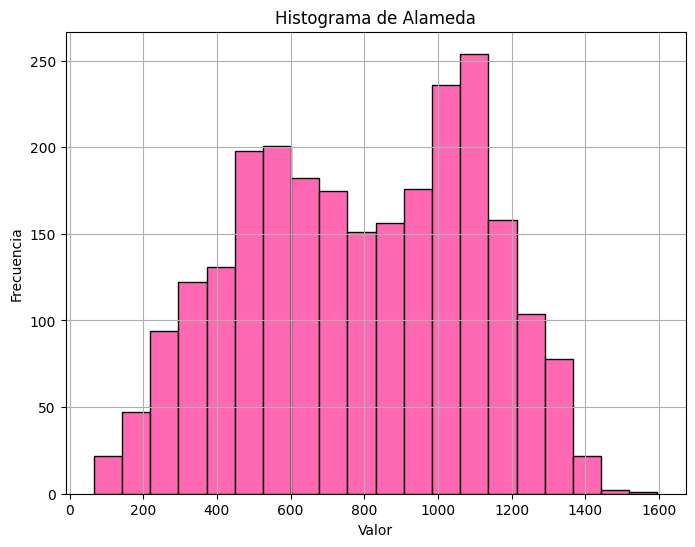

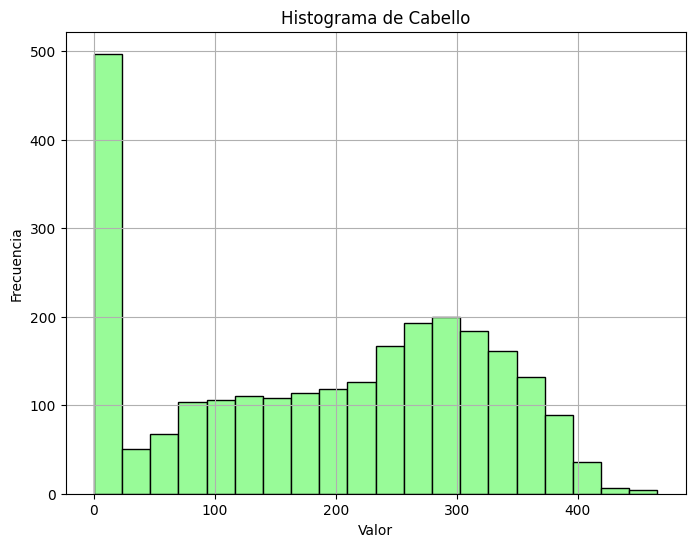

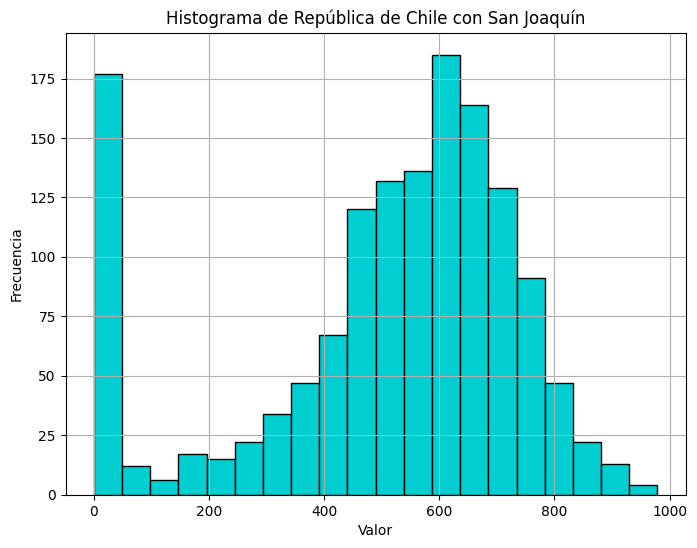

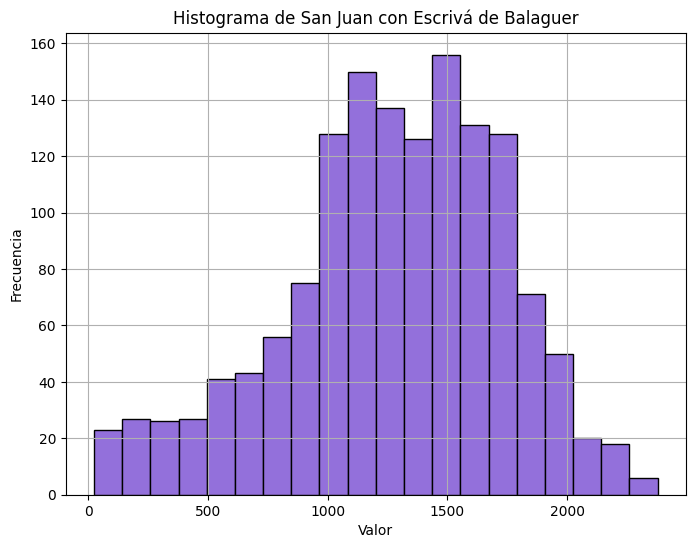

In [51]:
# histogramas 
plt.figure(figsize=(8, 6))
plt.hist(metodo_2['Alameda'], bins=20, color='#FF69B4', edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de Alameda')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(metodo_2['Cabello'], bins=20, color='#98FB98', edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de Cabello')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(metodo_2['República de Chile con San Joaquín'], bins=20, color='#00CED1', edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de República de Chile con San Joaquín')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(metodo_2['San Juan con Escrivá de Balaguer'], bins=20, color='#9370DB', edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de San Juan con Escrivá de Balaguer')
plt.grid(True)
plt.show()

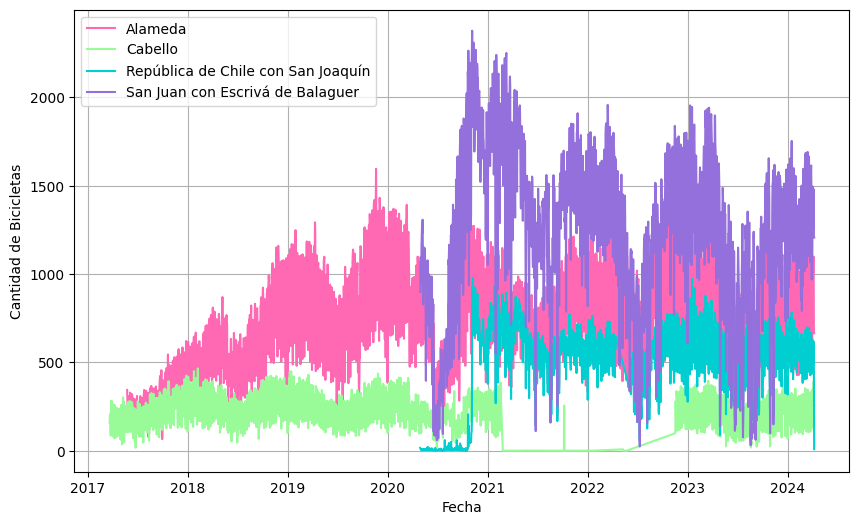

In [50]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Trazar la serie de tiempo para la columna 'Alameda'
plt.plot(metodo_2['Time'], metodo_2['Alameda'], color='#FF69B4', label='Alameda')

# Trazar la serie de tiempo para la columna 'Cabello'
plt.plot(metodo_2['Time'], metodo_2['Cabello'], color='#98FB98', label='Cabello')

# Trazar la serie de tiempo para la columna 'República de Chile con San Joaquín'
plt.plot(metodo_2['Time'], metodo_2['República de Chile con San Joaquín'], color='#00CED1', label='República de Chile con San Joaquín')

# Trazar la serie de tiempo para la columna 'San Juan con Escrivá de Balaguer'
plt.plot(metodo_2['Time'], metodo_2['San Juan con Escrivá de Balaguer'], color='#9370DB', label='San Juan con Escrivá de Balaguer')

# Configurar el título y las etiquetas de los ejes

plt.xlabel('Fecha')
plt.ylabel('Cantidad de Bicicletas')
plt.grid(True)
plt.legend()

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

In [15]:
#Metodo 3
# Calcular la moda de cada serie
moda_alameda = metodo_3['Alameda'].mean()
moda_cabello = metodo_3['Cabello'].mean()
moda_republica = metodo_3['República de Chile con San Joaquín'].mean()
moda_sanjuan = metodo_3['San Juan con Escrivá de Balaguer'].mean()

# Rellenar los valores faltantes con la moda
metodo_3['Alameda'].fillna(moda_alameda, inplace=True)
metodo_3['Cabello'].fillna(moda_cabello, inplace=True)
metodo_3['República de Chile con San Joaquín'].fillna(moda_republica, inplace=True)
metodo_3['San Juan con Escrivá de Balaguer'].fillna(moda_sanjuan, inplace=True)

metodo_3

C:\Users\maria\AppData\Local\Temp\ipykernel_1876\3297242281.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  metodo_3['Alameda'].fillna(moda_alameda, inplace=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_1876\3297242281.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

,Time,Alameda,Cabello,República de Chile con San Joaquín,San Juan con Escrivá de Balaguer
0,2017-03-21,787.644081,239.986021,505.036075,1271.545202
1,2017-03-22,787.644081,159.000000,505.036075,1271.545202
2,2017-03-23,787.644081,203.000000,505.036075,1271.545202
3,2017-03-24,787.644081,207.000000,505.036075,1271.545202
4,2017-03-25,787.644081,132.000000,505.036075,1271.545202
...,...,...,...,...,...
2570,2024-04-03,1006.000000,280.000000,490.000000,1249.000000
2571,2024-04-04,1088.000000,323.000000,584.000000,1454.000000
2572,2024-04-05,1099.000000,392.000000,618.000000,1481.000000
2573,2024-04-06,665.000000,257.000000,439.000000,1207.000000


In [17]:
from sklearn.metrics import mean_squared_error

# Reemplazar los valores NaN en los datos originales
df.fillna(df.mean(), inplace=True)

mse_alameda = mean_squared_error(df['Alameda'], metodo_3['Alameda'])
mse_cabello = mean_squared_error(df['Cabello'], metodo_3['Cabello'])
mse_republica = mean_squared_error(df['República de Chile con San Joaquín'], metodo_3['República de Chile con San Joaquín'])
mse_sanjuan = mean_squared_error(df['San Juan con Escrivá de Balaguer'], metodo_3['San Juan con Escrivá de Balaguer'])

print("MSE Alameda:", mse_alameda)
print("MSE Cabello:", mse_cabello)
print("MSE República de Chile con San Joaquín:", mse_republica)
print("MSE San Juan con Escrivá de Balaguer:", mse_sanjuan)

MSE Alameda: 0.0
MSE Cabello: 0.0
MSE República de Chile con San Joaquín: 0.0
MSE San Juan con Escrivá de Balaguer: 0.0


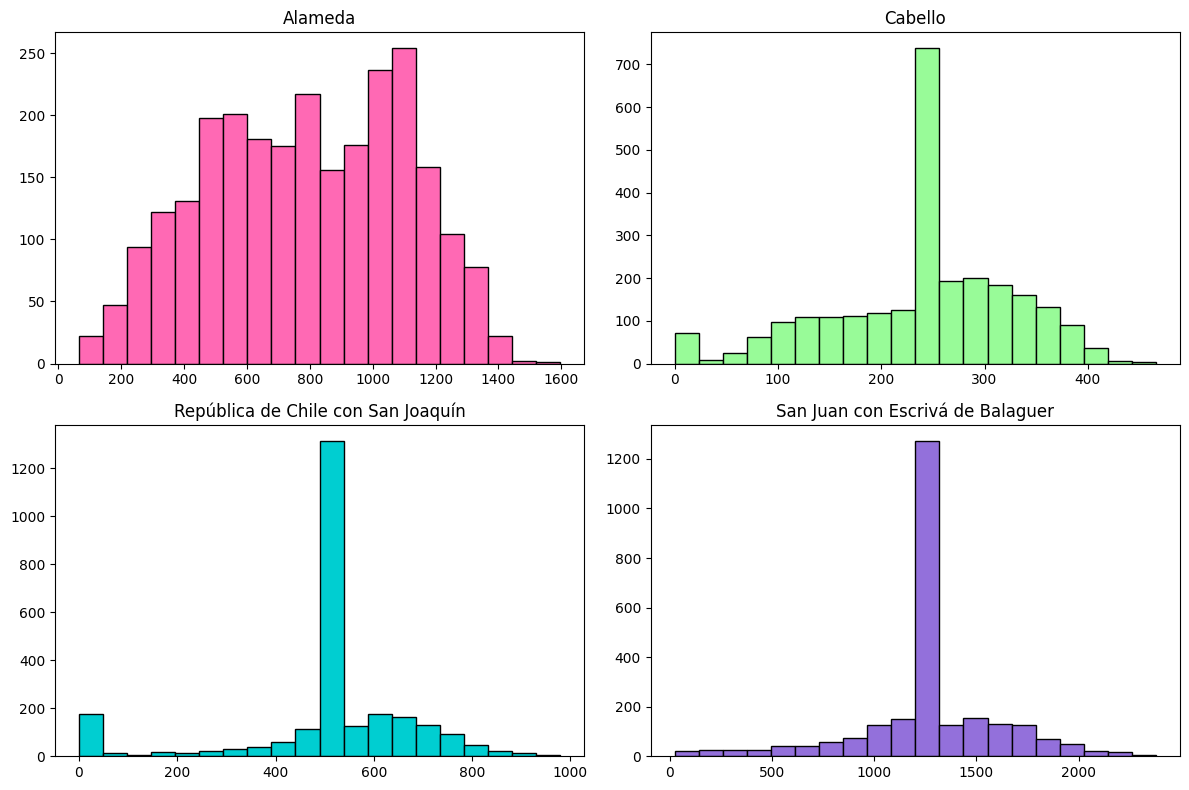

In [8]:
# Graficar histograma para cada serie con bordes
plt.figure(figsize=(12, 8))

plt.subplot(221)  
plt.hist(metodo_3['Alameda'], color='#FF69B4', bins=20, edgecolor='black')
plt.title('Alameda')

plt.subplot(222)  
plt.hist(metodo_3['Cabello'], color='#98FB98', bins=20, edgecolor='black')
plt.title('Cabello')

plt.subplot(223)  
plt.hist(metodo_3['República de Chile con San Joaquín'], color='#00CED1', bins=20, edgecolor='black')
plt.title('República de Chile con San Joaquín')

plt.subplot(224)  
plt.hist(metodo_3['San Juan con Escrivá de Balaguer'], color='#9370DB', bins=20, edgecolor='black')
plt.title('San Juan con Escrivá de Balaguer')

plt.tight_layout()
plt.show()

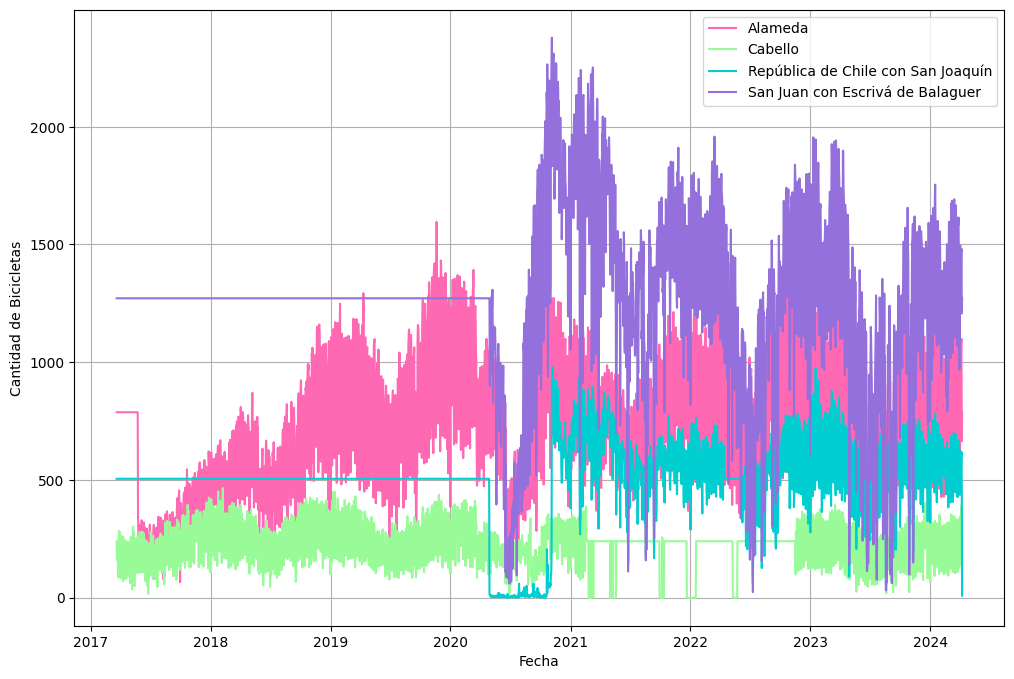

In [9]:
# Graficar las series de tiempo
plt.figure(figsize=(12, 8))

plt.plot(metodo_3['Time'], metodo_3['Alameda'], color='#FF69B4', label='Alameda')
plt.plot(metodo_3['Time'], metodo_3['Cabello'], color='#98FB98', label='Cabello')
plt.plot(metodo_3['Time'], metodo_3['República de Chile con San Joaquín'], color='#00CED1', label='República de Chile con San Joaquín')
plt.plot(metodo_3['Time'], metodo_3['San Juan con Escrivá de Balaguer'], color='#9370DB', label='San Juan con Escrivá de Balaguer')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de Bicicletas')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
#metodo 4
# Define el rango de fechas que deseas filtrar
fecha_inicio = pd.to_datetime('2017-03-22')
fecha_fin = pd.to_datetime('2021-02-19')

# Filtra el DataFrame por el rango de fechas en la columna 'fecha'
datos_filtrados = metodo_4[(metodo_4['Time'] >= fecha_inicio) & (metodo_4['Time'] <= fecha_fin)]
datos_filtrados_time = datos_filtrados['Time']
datos_filtrados_cabello = datos_filtrados['Cabello']
cabello = pd.DataFrame({'Time': datos_filtrados_time, 'Cabello': datos_filtrados_cabello})
cabello

,Time,Cabello
1,2017-03-22,159.0
2,2017-03-23,203.0
3,2017-03-24,207.0
4,2017-03-25,132.0
5,2017-03-26,86.0
...,...,...
1427,2021-02-15,370.0
1428,2021-02-16,350.0
1429,2021-02-17,386.0
1430,2021-02-18,294.0


In [27]:
from sklearn.linear_model import LinearRegression

# Elimina filas con valores faltantes en 'X' o 'Y'
datos = datos_filtrados.dropna(subset=['Time', 'Cabello'])

# Separar los datos en variables independientes (X) y dependientes (Y)
X = datos[['Time']]  # Ahora X es una matriz bidimensional
Y = datos['Cabello']

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, Y)

# Predecir los valores faltantes en 'Y' basados en 'X'
Y_pred = modelo.predict(X)

# Rellenar los valores faltantes en 'Cabello' con las predicciones
datos['Cabello'].fillna(pd.Series(Y_pred), inplace=True)

# Mostrar los datos actualizados
print(datos)

UFuncTypeError: ufunc 'matmul' did not contain a loop with signature matching types (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>) -> None